# Bin Packing Lab

- Authors:
  - Cameron Dunn, dunnc11@mcmaster.ca
  - Rafeed Iqbal, iqbalr8@mcmaster.ca
- Group ID on Avenue: 23
- Gitlab URL: https://gitlab.cas.mcmaster.ca/dunnc11/l-2-bin-packing-group-23

# T1

The given code is a good standard for how to follow the SOLID principles, as well as DRY.
## Single Responsibility:
Every class in the given codebase has a single purpose. The readers return data from their respective datasets, and in MacPacking the algorithms are divided into classes based on if it is an online algorithm or an offline algorithm. Each class has only a single responsibility, the types of input and output are common across the algorithms, so the behaviour of any single algorithm is predictable.
## Open for Extension/Closed for Modification:
It is easy to add a new algorithm to online or offline following the abstract process given, and one does not need to modify the interface or how any previous algorithm behaves to add a new algorithm to the codebase.
## Interface Segregation:
The interfaces for the inputs and outputs of the algorithms are modelled outside the class, this makes the code modular and lowers the dependency of one module on another. This allows the codebase to have low coupling and high cohesion.
## Designing for Interfaces:
Low level classes are separated from their higher-level interfaces, and every reader and bin packing algorithm is designed with the purpose of being usable only by calling the higher level interface functions.

## Dataset Dimensions:
Every case in the dataset has three dimensions, N, C and W. N is the number of elements to be sorted into bins, C is holding capacity of each bin and W is the range of weight values any one element can have.
The values for the dimensions are defined in data within the files or their names. Knowing where the data is located is crucial for implementing a data-reader which will adhere to the required interface. It is also very useful in testing and benchmarking as knowing what range of values are being used for each dimension lets us classify which solutions are better in which use-cases.


# T2 / T4

Number of bins used across the dataset
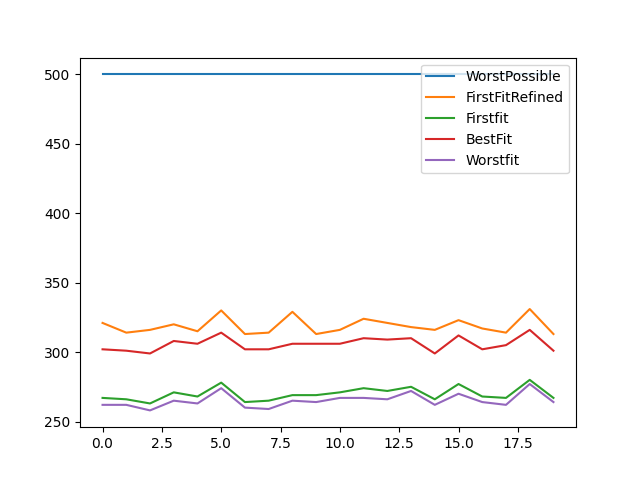
The purpose of this KPI metric is to quite basic, we want to minimize the amount of bins used therefore we should be tracking and recording how many bins each algorithm uses. We can cleary see that WorstPossible is the worst possible algorithm and that WorstFit is the best in terms of bins used. 
What is suprising to see is that outside of WorstPossible for obvious reasons, that FirstFitRefined is the worst when it comes to the number of bins. You would expect it to have a better result as a more refined algorithm.


Runtimes across the dataset
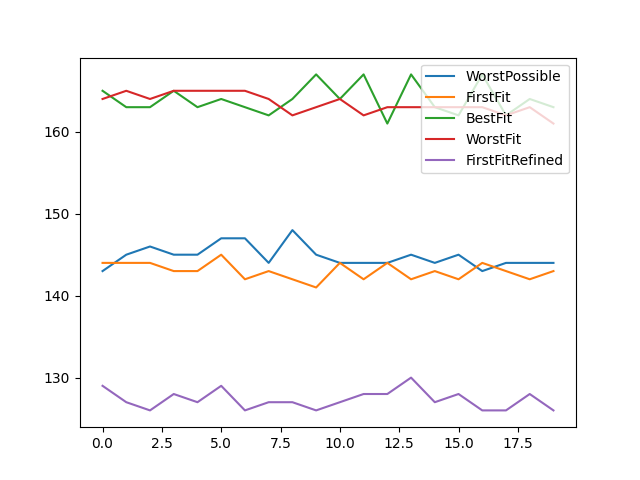
Runtimes is a very standard KPI to use since everyone wants their algorithms to be as fast as possible. BestFit and WorstFit take the longest which makes sense given that they need to analyse the entire dataset before they can add an item to the bin. 
Runtime is the metric where FirstFitRefined beats out all of the other algorithms which is likely due to it's implementation being more algebraic thanks to the normalization

Standard Deviation between bins across the dataset
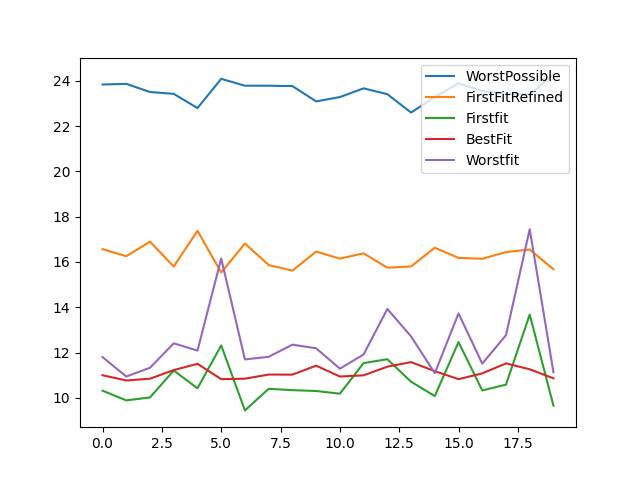
While not the most obvious metric to use, we believe that standard deviation makes for a good metric to compare different algorithms outside of runtime and number of bins used, this is because it is important to know for your use case. Do you want the items to be spread across the bins evenly or do you want a more clustured result. Standard deviation is the answer to that question with a higher standard deviation representing a more clustured result and a lower standard deviation fitting a more evenly spread result. WorstPossible has the highest standard deviation and FirstFit and BestFit are always the lowest or 2nd lowest for standard deviation.
FirstFitRefined has the highest standard deviation outside of WorstPossible which is a bit suprising given that you would expect a more refined algorithm to produce a more evenly spread result.

# T3

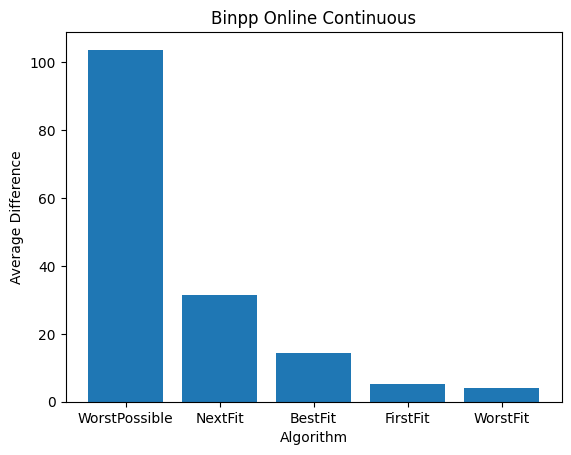

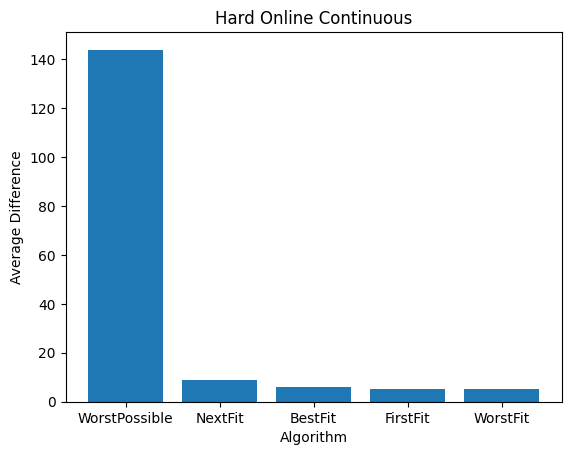

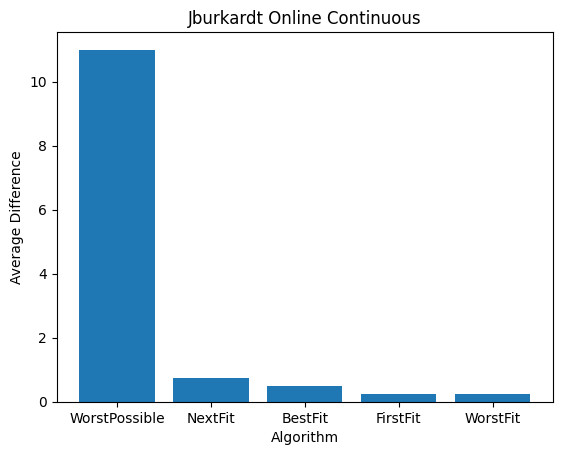

In [1]:
from oracle.online_continuous import *
from macpacking.algorithms.online import *
from macpacking.algorithms.baseline import BenMaier
import matplotlib as mpl
import matplotlib.pyplot as plt
algos = [WorstPossible, NextFit, BestFit, FirstFit, WorstFit]
oracles = [Binpp, Hard, Jburkardt]

for oracle in oracles:
    data = oracle(algos).experiment()
    fig, ax = plt.subplots()
    plt.bar(data.keys(), data.values())
    plt.title(oracle.__name__ + ' Online Continuous')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Average Difference')

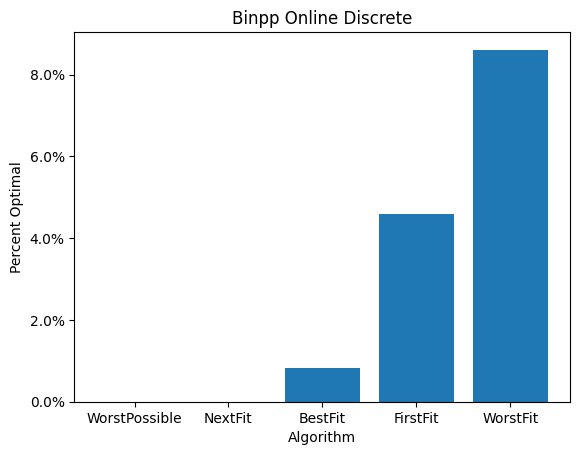

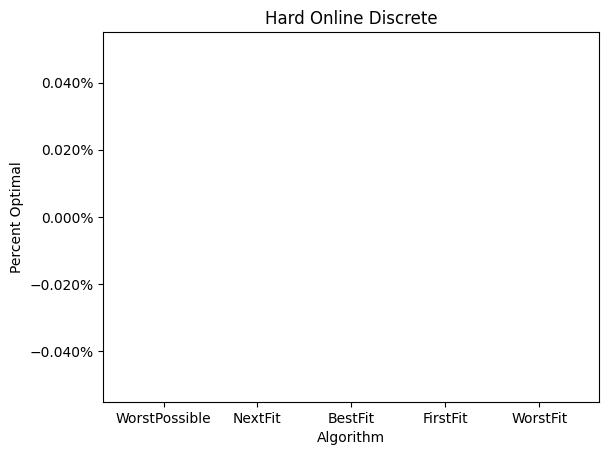

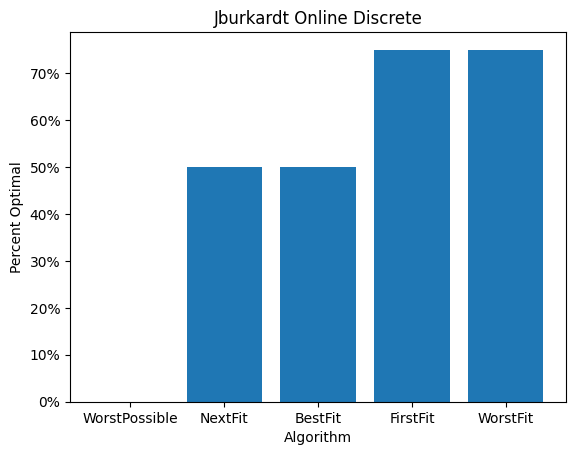

In [2]:
from oracle.online_discrete import *
from macpacking.algorithms.online import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
algos = [WorstPossible, NextFit, BestFit, FirstFit, WorstFit]
oracles = [Binpp, Hard, Jburkardt]

for oracle in oracles:
    data = oracle(algos).experiment()
    fig, ax = plt.subplots()
    plt.bar(data.keys(), data.values())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.title(oracle.__name__ + ' Online Discrete')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Percent Optimal')

For the online algorithms they follow a very nice heirarchy of quality which is that WorstPossible <= NexFit <= BestFit <= FirstFit <= WorstFit and there are no clear exceptions to this rule within the provided datasets

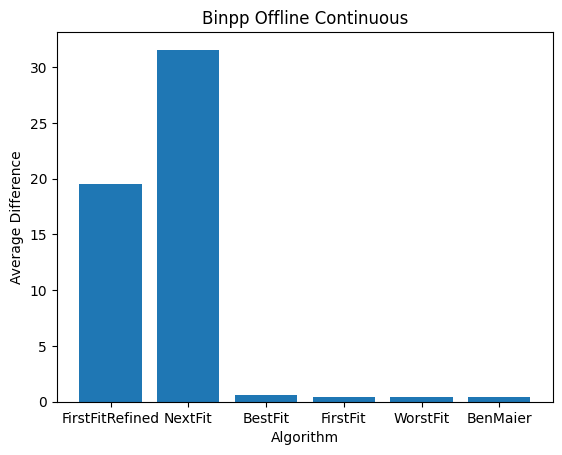

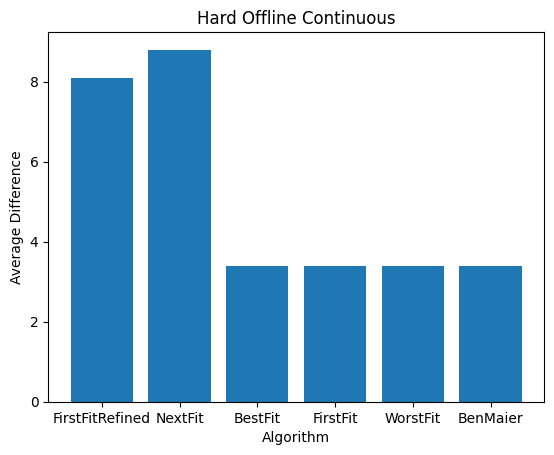

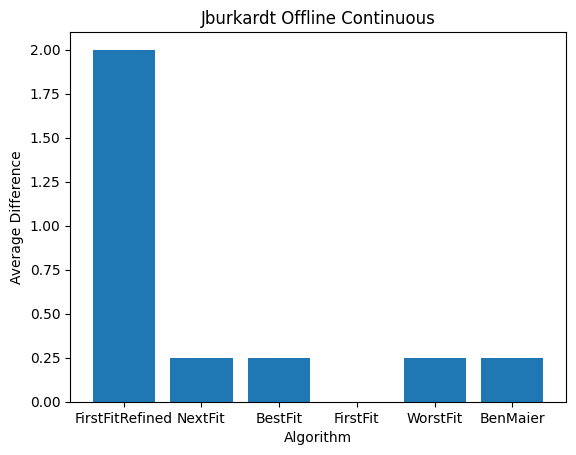

In [6]:
from oracle.offline_continuous import *
from macpacking.algorithms.offline import *
import matplotlib as mpl
import matplotlib.pyplot as plt
algos = [FirstFitRefined, NextFit, BestFit, FirstFit, WorstFit, BenMaier]
oracles = [Binpp, Hard, Jburkardt]

for oracle in oracles:
    data = oracle(algos).experiment()
    fig, ax = plt.subplots()
    plt.bar(data.keys(), data.values())
    plt.title(oracle.__name__ + ' Offline Continuous')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Average Difference')

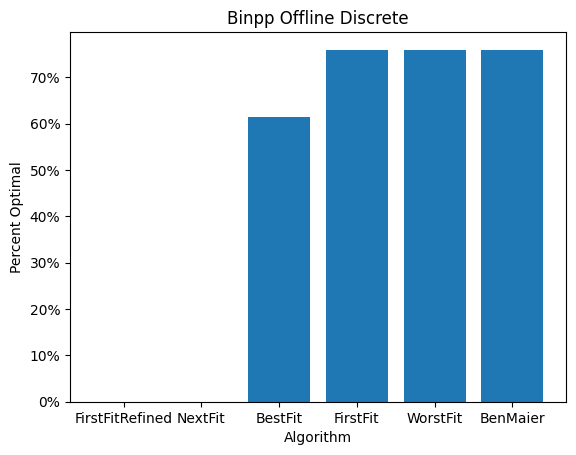

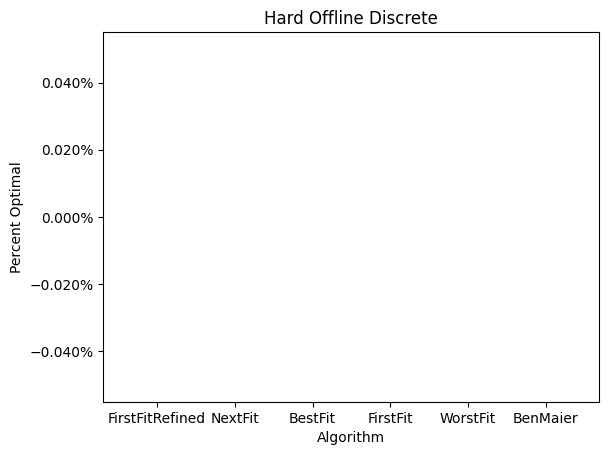

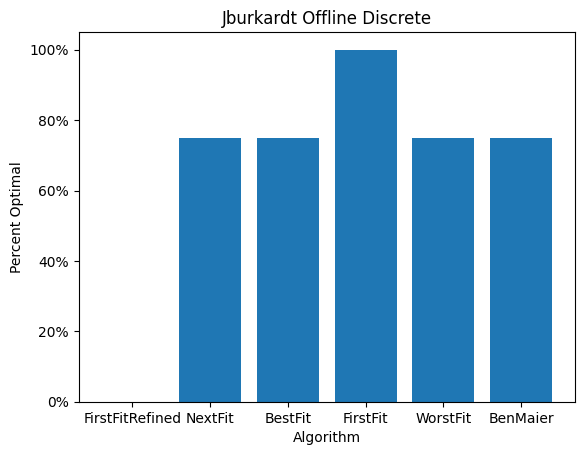

In [5]:
from oracle.offline_discrete import *
from macpacking.algorithms.offline import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
algos = [FirstFitRefined, NextFit, BestFit, FirstFit, WorstFit, BenMaier]
oracles = [Binpp, Hard, Jburkardt]

for oracle in oracles:
    data = oracle(algos).experiment()
    fig, ax = plt.subplots()
    plt.bar(data.keys(), data.values())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.title(oracle.__name__ + ' Offline Discrete')
    ax.set_xlabel('Algorithm')
    ax.set_ylabel('Percent Optimal')

For the offline algorithms it is clear that the ones that struggle the most are FirstFitRefined and NextFit, outside of those 2 it is fairly clear that most of the other algorithms perform very similarly. The exception to this rule is FirstFit which perfectly matches the optimal solution for the Jburkardt dataset and in doing so actually outperforms the baseline BenMaier binpacking implementation

# T5

Runtimes across the dataset
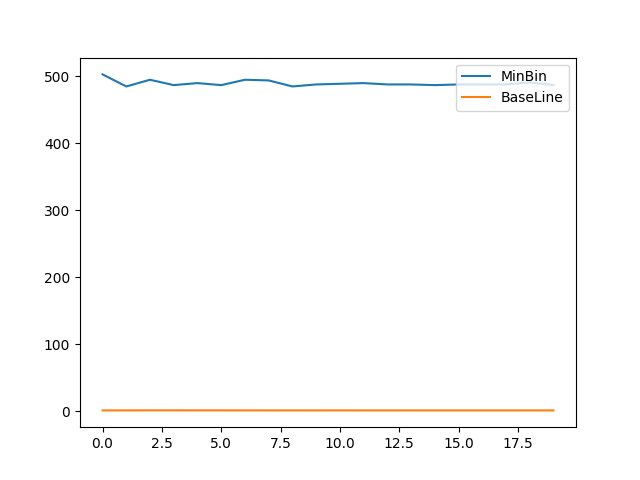

Standard Deviation between bins across the dataset
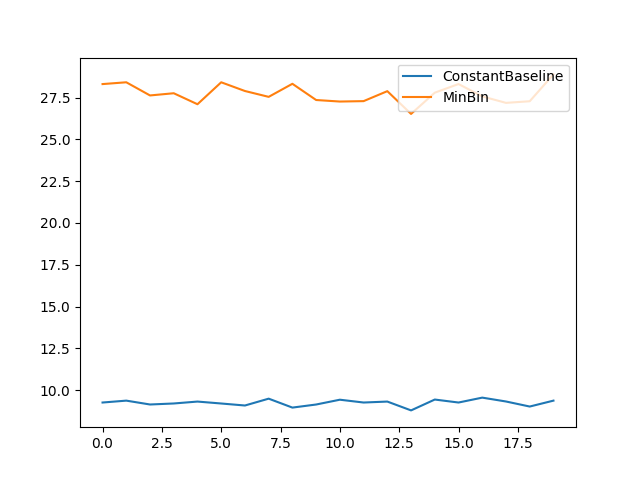

It is pretty clear that Baseline significantly outpreform our naive implementation by several orders of magnitude when it comes to time and standard deviation. These benchmarks are the most important since we want to make sure that all of the weights within the bins are evenly distributed

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)

Rafeed Iqbal:

  - What process did you go through to produce this result? (Backward)
    -  First I had to gain a firm grasp on the codebase, the datasets, and what the bin packing problem is. The provided code as well as the given resources made it easier understand what I was working with, as well as gave me a guideline to follow when adhering to SOLID principles and developing readable, high-quality code. After understanding the basic bin packing problem, I moved on to implementing different versions which follow different heuristics. It was critical to understand how each algorithm is supposed to function as well as how all the interfaces and models are defined.
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
    - I was very disappointed with my work in lab 1, and I strove to improve upon it. My code for lab 1 failed to adhere to OOP principles like SOLID and DRY and was unable to pass the flake test. For this lab I hoped to implement functions which were not only optimal but which followed SOLID principles and was readable as well.
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
    - The understanding that we've grasped on the topic as well as the quality of the code written. I would also like the in depth analysis given on the problem, codebase and dataset to be noticeable.
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)
    - The importance of testing as you go, analysis and benchmarking your implementations, as well as how important it is to understand the problem at hand first before beginning to implement functions.

Cameron Dunn:

  - What process did you go through to produce this result? (Backward)
      - I looked at each of the tasks that were requested, and I tried to think of the best way that I could encapsulate that task and then started from there. As I started writing down all of the component tasks that were required, I considered if those should be encapsulated as well and that continued until the final product was reached.
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
      - My standards were to get all of the task components completed and I think that I met that standard. I made sure to write out a list of everything we were supposed to do and slowly removed items off of that list as we completed them.
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
      - I’m honestly quite proud of how I modularized the oracle files such that it is very easy to swap out what algorithms and datasets you are experimenting on and also how relatively simple it would be to add new forms of comparison and data file types.
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)
      - One thing that happened was that I miss assumed how the Jburkardt data type was supposed to work and I only realized my mistake at the end of the project. But thankfully because of how I used SOLID principles when designing the reader, its components as well as its dependencies, the only thing that I had to change was how the JburkdardtReader interpreted the input and after I fixed that everything else worked perfectly fine. I was really worried I would have to go through and change a lot of little things afterwards but thanks to SOLID principles I only need to change one function.

